In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import fixed_point
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import estimation_functions



In [39]:
np.random.seed(100)

In [40]:
df = pd.read_csv(f'../data/market_integrates_1.csv')
print(df)


     market_ids  firm_ids  characteristic1  characteristic2    prices  \
0             1         1         5.348061        20.964655  3.263354   
1             1         2         5.134796        20.155075  4.093757   
2             1         3         5.170203        20.191143  4.084675   
3             1         4         5.551272        20.831672  3.431042   
4             1         5         5.830341        20.934608  2.991747   
..          ...       ...              ...              ...       ...   
995         100         6         5.977387        20.225459  3.347218   
996         100         7         5.083662        20.315749  3.435301   
997         100         8         5.254944        20.117505  3.581924   
998         100         9         5.849048        20.945524  2.807978   
999         100        10         5.302210        20.055657  3.206264   

     marginal_cost    shares   profits   markups  e_quantity    capital  \
0         0.870393  0.023810  0.056976  3.749289

In [41]:
n_firms = 10

df2 = df.groupby('market_ids').sum('shares')
outside_good = np.repeat(np.array(df2.shares), n_firms)

# Get outside good same shape datagrame repeat each 10 times 
y = np.log(np.array(df.shares)) - np.log(outside_good)
print(y)


[-2.26661241 -2.23620335 -2.26150152 -2.39707343 -2.38193157 -2.46353064
 -2.26709096 -2.16938739 -2.46295389 -2.17378288 -2.3307608  -2.25583323
 -2.19822069 -2.3928708  -2.34091753 -2.53685949 -2.29065619 -2.18509894
 -2.46827031 -2.10477694 -2.39180011 -2.3180747  -2.20535589 -2.3083236
 -2.36975425 -2.55480869 -2.24957691 -2.14395703 -2.48872576 -2.0909269
 -2.32190328 -2.26289308 -2.26939052 -2.3112726  -2.25818305 -2.53955949
 -2.29514273 -2.25808615 -2.47698717 -2.09867036 -2.32699271 -2.21862493
 -2.22236037 -2.2571027  -2.3157617  -2.51963308 -2.2683158  -2.3437086
 -2.48803272 -2.129173   -2.36893186 -2.24846672 -2.2360106  -2.25177339
 -2.33822557 -2.48284432 -2.20694143 -2.42608181 -2.41953486 -2.1088649
 -2.36721127 -2.21437871 -2.22864276 -2.22335233 -2.43058319 -2.48216598
 -2.18164754 -2.38902322 -2.43049229 -2.14557233 -2.35825409 -2.27692419
 -2.28092062 -2.20495812 -2.44813756 -2.42454564 -2.15292329 -2.41618314
 -2.45357244 -2.08742684 -2.41938439 -2.2699245  -2.190

In [42]:
# Easy ols estimation 

x = df[['prices', 'characteristic1', 'characteristic2']]

res = LinearRegression().fit(x, y)

print('Intercept: \n', res.intercept_)
print('Coefficients: \n', res.coef_)



Intercept: 
 4.0267925849032125
Coefficients: 
 [-0.18983886 -0.40729047 -0.16966635]


In [43]:
# Frist stage regression some work 

x = df[['marginal_cost', 'characteristic1', 'characteristic2']]

res = LinearRegression().fit(x, df['prices'])

print('Intercept: \n', res.intercept_)
print('Coefficients: \n', res.coef_)

predictions_price = res.predict(x)
df['predict_prices'] = predictions_price


Intercept: 
 3.355633734351084
Coefficients: 
 [ 1.46691632 -0.04969762 -0.06726274]


In [44]:
# Second stage: 

x = df[['predict_prices', 'characteristic1', 'characteristic2']]

res = LinearRegression().fit(x, y)

print('Intercept: \n', res.intercept_)
print('Coefficients: \n', res.coef_)



Intercept: 
 7.458868058168825
Coefficients: 
 [-0.40943851 -0.48665066 -0.27961568]


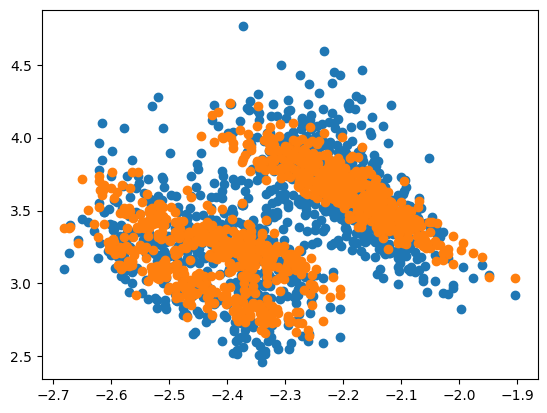

In [45]:

plt.scatter(y, df.prices)
plt.scatter(y, df.predict_prices)
plt.show()

In [46]:
# theta_0 = np.array([2, -0.5, 0.3, 0.05, 1.])
# theta_0 = np.array([2., -0.5, -0.3, 0.5, 1.])

# theta_0 = np.array([1.5, -1, -0.5, 0.5, 1.])
theta_0 = np.array([1., 1., 1., 1., 1.])





In [47]:
def f(theta, df, n_consumers, n_firms, T):
    # true_shares = np.array(df.shares)
    true_share = np.log(np.array(df.shares))
    all_est_shares = np.zeros(T*n_firms)
    v_p_all = np.random.normal(0, 1, n_consumers*T)
    for t in range(0, T-1):
        v_p = v_p_all[t*n_consumers:(t+1)*n_consumers]
        estimates_shares_market = np.log(estimation_functions.simulate_market_shares_per_period(theta, df, v_p, n_consumers, n_firms, t))
        all_est_shares[t*n_firms:(t+1)*n_firms] = estimates_shares_market
        mse = mean_squared_error(true_share, all_est_shares)
    return mse

In [48]:
def f(theta, df, n_consumers, n_firms, T):
    # true_shares = np.array(df.shares)
    true_share = np.log(np.array(df.shares))
    all_est_shares = np.zeros(T*n_firms)
    v_p_all = np.random.normal(0, 1, n_consumers*T)
    for t in range(0, T-1):
        v_p = v_p_all[t*n_consumers:(t+1)*n_consumers]
        estimates_shares_market = np.log(estimation_functions.simulate_market_shares_per_period(theta, df, v_p, n_consumers, n_firms, t))
        all_est_shares[t*n_firms:(t+1)*n_firms] = estimates_shares_market
    
    mse = mean_squared_error(true_share, all_est_shares)
    return mse

In [49]:
def fixed(theta, df, n_consumers, n_firms, time):
    v_p_all = np.random.normal(0, 1, n_consumers*time)
    all_est_shares = np.zeros(time*n_firms)
    indirect_utility_all = np.zeros(time*n_firms)
    for t in range(0, time):
        v_p = v_p_all[t*n_consumers:(t+1)*n_consumers]
        try1 = estimation_functions.simulate_market_shares_per_period(theta, df, v_p, n_consumers, n_firms, t)
        try2 = estimation_functions.get_indirect_utility(theta, df, n_firms, t)
        all_est_shares[t*n_firms:(t+1)*n_firms] = try1
        indirect_utility_all[t*n_firms:(t+1)*n_firms] = try2
    


    obj = indirect_utility_all - np.log(df.shares/all_est_shares)
    return(obj)





In [50]:
N = 500
firms  = 10
time = 100 
theta_0 = np.array([2., -0.5, -0.3, 0.5, 1.])



res = fixed(theta_0, df, N, firms, time)
print(res)

# res = fixed_point(fixed, theta_0, args=(df, N, firms, time, v_p_all))
# optim_vec = res.x

0     -15.796836
1     -17.732956
2     -17.736446
3     -16.319529
4     -15.282941
         ...    
995   -16.156442
996   -15.974546
997   -16.396680
998   -14.851830
999   -15.387236
Name: shares, Length: 1000, dtype: float64


In [51]:
# Get the function for the fixed point iteration 

In [52]:
N = 500
firms  = 5
time = 100 

all_val_b0 = []
all_val_b1 = []
all_val_b2 = []
all_val_mu = []
all_val_omega = []
mean_share = []

for l in range(1, 5):
    
    res = minimize(f, theta_0, args=(df, N, firms, time), method = 'Nelder-Mead')
    optim_vec = res.x

    all_val_b0.append(optim_vec[0])
    all_val_b1.append(optim_vec[1])
    all_val_b2.append(optim_vec[2])
    all_val_mu.append(optim_vec[3])
    all_val_omega.append(optim_vec[4])

    # new_shares = estimation_functions.shares_optimal(optim_vec, df, v_p, N, firms, time)


df_estimation_values = pd.DataFrame({'beta_0': all_val_b0,
                                    'beta_1': all_val_b1,
                                    'beta_2': all_val_b2, 
                                    'mu': all_val_mu, 
                                    'omega': all_val_omega, 
                                    })
df_estimation_values.to_csv(f'../data/first_estimation_market_inter_100', index=False)


ValueError: Found input variables with inconsistent numbers of samples: [1000, 500]

In [ ]:
print(df_estimation_values)
df_estimation_values.to_csv(f'../data/estimation_thetaones.csv', index=False)

     beta_0    beta_1    beta_2        mu     omega
0  1.251203 -1.048799 -0.059659  1.018718  1.505539
1  0.933265 -1.121926 -0.050857  1.038126  1.634821
2  1.285060 -1.031074 -0.084013  1.099431  1.603690
3  1.288822 -1.105628 -0.066474  1.037821  1.606252


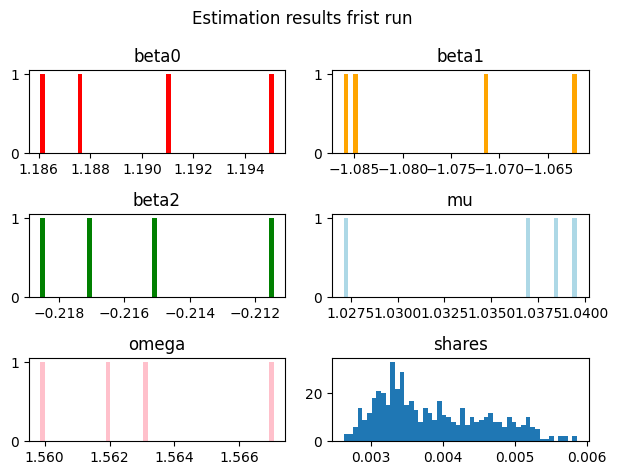

In [ ]:
fig, [[ax1, ax2], [ax3, ax4], [ax5, ax6]] = plt.subplots(3, 2)
fig.suptitle(f'Estimation results frist run')

ax1.hist(df_estimation_values.beta_0, bins=50, color='red')
ax2.hist(df_estimation_values.beta_1, bins=50, color='orange')
ax3.hist(df_estimation_values.beta_2, bins=50, color='green')
ax4.hist(df_estimation_values.mu, bins=50, color='lightblue')
ax5.hist(df_estimation_values.omega, bins=50, color='pink')
ax6.hist(df.shares, bins=50)


ax1.set_title('beta0')
ax2.set_title('beta1')
ax3.set_title('beta2')
ax4.set_title('mu')
ax5.set_title('omega')
ax6.set_title('shares')

plt.tight_layout()
plt.show()
